## Road - Deaths | Data Visualization | Seaborn

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing and Preprocessing Data

In [61]:
df = pd.read_csv(r'C:\Users\mukes\Downloads\road_death.csv')
df.head()

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
0,Afghanistan,AFG,1990,4154,0,12412311.0
1,Afghanistan,AFG,1991,4472,0,13299016.0
2,Afghanistan,AFG,1992,5106,0,14485543.0
3,Afghanistan,AFG,1993,5681,0,15816601.0
4,Afghanistan,AFG,1994,6001,0,17075728.0


In [62]:
df.rename(columns = {'Entity':'Region', 'Sidedness' : 'Side'}, inplace = True)
df.head()

,Region,Code,Year,Deaths,Side,Historical_Population
0,Afghanistan,AFG,1990,4154,0,12412311.0
1,Afghanistan,AFG,1991,4472,0,13299016.0
2,Afghanistan,AFG,1992,5106,0,14485543.0
3,Afghanistan,AFG,1993,5681,0,15816601.0
4,Afghanistan,AFG,1994,6001,0,17075728.0


In [63]:
df.drop(columns='Code', inplace=True)

In [64]:
df.head()

,Region,Year,Deaths,Side,Historical_Population
0,Afghanistan,1990,4154,0,12412311.0
1,Afghanistan,1991,4472,0,13299016.0
2,Afghanistan,1992,5106,0,14485543.0
3,Afghanistan,1993,5681,0,15816601.0
4,Afghanistan,1994,6001,0,17075728.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 8010 non-null   object 
 1   Year                   8010 non-null   int64  
 2   Deaths                 8010 non-null   int64  
 3   Side                   8010 non-null   int64  
 4   Historical_Population  6300 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 313.0+ KB


In [66]:
df.duplicated().sum()

0

In [67]:
df.isna().sum()

Region                      0
Year                        0
Deaths                      0
Side                        0
Historical_Population    1710
dtype: int64

In [68]:
df[df['Historical_Population'].isna()]['Region'].unique()

array(['African Region', 'African Union', 'America',
       'Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central sub-Saharan Africa',
       'Commonwealth', 'Commonwealth High Income',
       'Commonwealth Low Income', 'Commonwealth Middle Income',
       'East Asia', 'East Asia & Pacific - World Bank region',
       'Eastern Europe', 'Eastern Mediterranean Region',
       'Eastern sub-Saharan Africa', 'England',
       'Europe & Central Asia - World Bank region', 'European Region',
       'European Union', 'G20', 'High SDI', 'High-income',
       'High-income Asia Pacific', 'High-income North America',
       'High-middle SDI', 'Latin America & Caribbean - World Bank region',
       'Low SDI', 'Low-middle SDI', 'Middle East & North Africa',
       'Middle SDI', 'Nordic Region', 'North Africa and Middle East',
       'Northern Ireland', 'OECD Count

In [69]:
median_pop = df['Historical_Population'].median()
df['Historical_Population'].fillna(median_pop, inplace=True)

In [70]:
df['%_death'] = (df['Deaths'] / df['Historical_Population']) * 100
df['%_death'].head()

0    0.033467
1    0.033627
2    0.035249
3    0.035918
4    0.035143
Name: %_death, dtype: float64

In [71]:
df.drop(columns=['Historical_Population'], inplace=True, axis = 1)
df.head()

,Region,Year,Deaths,Side,%_death
0,Afghanistan,1990,4154,0,0.033467
1,Afghanistan,1991,4472,0,0.033627
2,Afghanistan,1992,5106,0,0.035249
3,Afghanistan,1993,5681,0,0.035918
4,Afghanistan,1994,6001,0,0.035143


Total Deaths Region wise from 1990-2019 (in top 30 Regions)

In [75]:
total_deaths_region_wise = df.groupby('Region')['Deaths'].sum().reset_index()
total_deaths_region_wise.columns = ['Region', 'Total Deaths']
total_deaths_region_wise = total_deaths_region_wise.sort_values('Total Deaths', ascending=False)[:30]
total_deaths_region_wise.head()

,Region,Total Deaths
259,World,36317087
91,G20,23328740
14,Asia,21670793
263,World Bank Upper Middle Income,16041327
152,Middle SDI,13623644


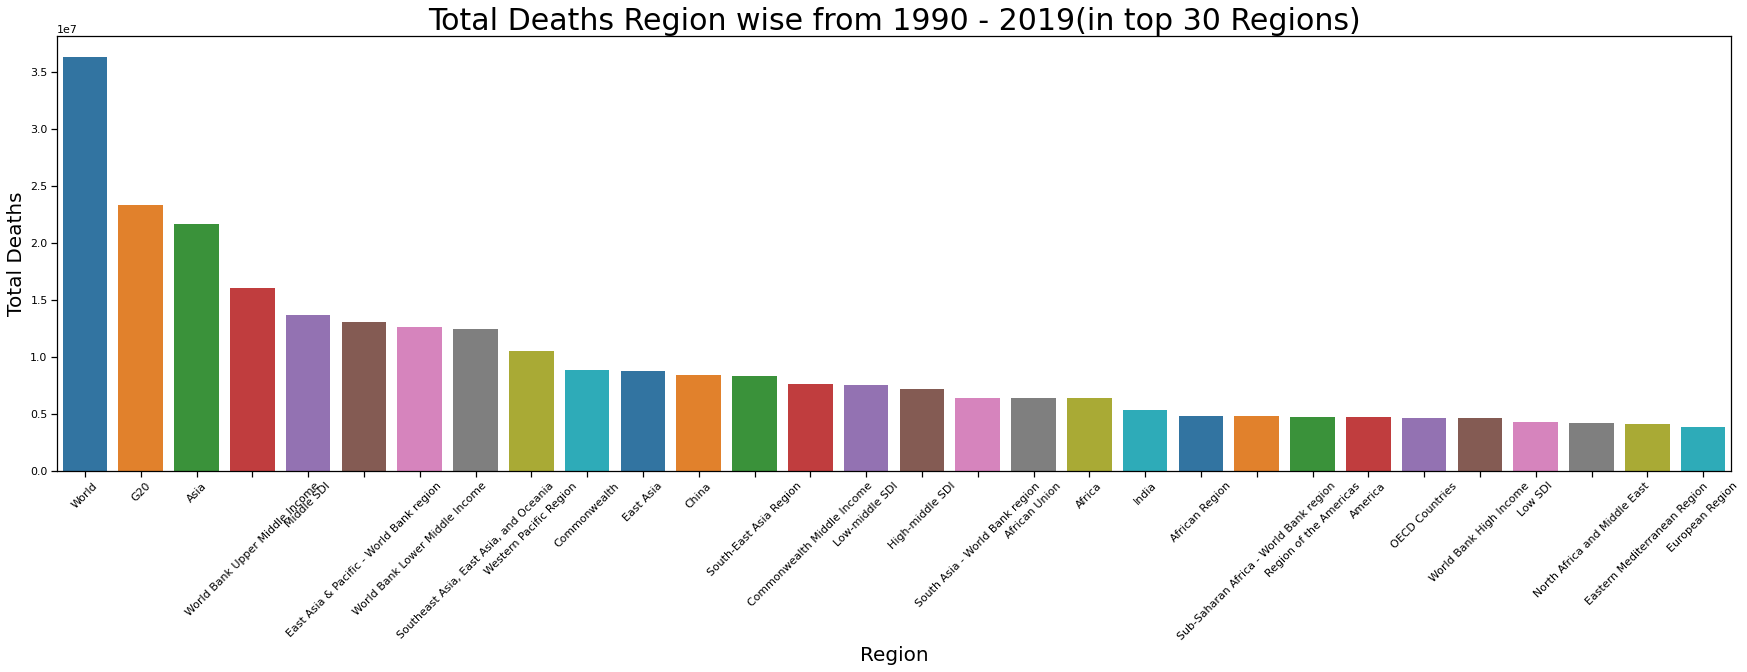

In [79]:
sns.set_context('notebook', font_scale=1)
plt.figure(figsize=(30, 8))
sns.barplot(data=total_deaths_region_wise, x = 'Region', y = 'Total Deaths', palette='tab10')
plt.title('Total Deaths Region wise from 1990 - 2019(in top 30 Regions)', size = 30)
plt.ylabel('Total Deaths', size = 20)
plt.xlabel('Region', size = 20)
plt.xticks(rotation = 45)
plt.show()


Total Deaths Region wise from 1990-2019 (in top 30 Regions with respect to side of Driving)

In [80]:
total_deaths_region_wise_side = df.groupby(['Region', 'Side'])['Deaths'].sum().reset_index()
total_deaths_region_wise_side.columns = ['Region', 'Side', 'Total Deaths']
total_deaths_region_wise_side = total_deaths_region_wise_side.sort_values('Total Deaths', ascending = False)[:30]
total_deaths_region_wise_side.head()

,Region,Side,Total Deaths
259,World,0,36317087
91,G20,0,23328740
14,Asia,0,21670793
263,World Bank Upper Middle Income,0,16041327
152,Middle SDI,0,13623644


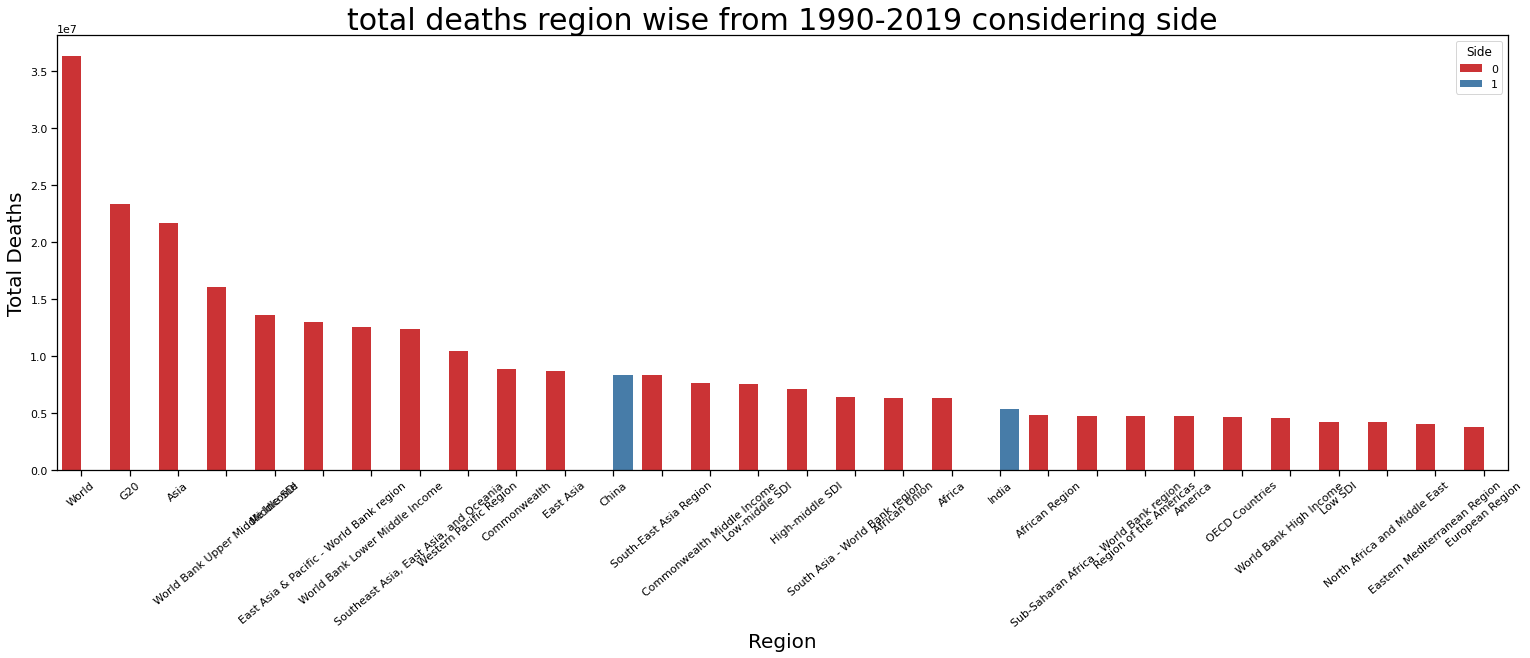

In [84]:
plt.figure(figsize=(26, 8))
sns.barplot(data = total_deaths_region_wise_side, x = 'Region', y = 'Total Deaths', hue = 'Side', palette = 'Set1')
plt.title('total deaths region wise from 1990-2019 considering side', size = 30)
plt.ylabel('Total Deaths', size = 20)
plt.xlabel('Region', size = 20)
plt.xticks(rotation = 40)
plt.show()

Median Deaths Region wise from 1990-2019 (in top 30 Regions)

In [85]:
median_deaths_region_wise = df.groupby('Region')['Deaths'].median().reset_index()
median_deaths_region_wise.columns = ['Region', 'Median Deaths']
median_deaths_region_wise = median_deaths_region_wise.sort_values('Median Deaths', ascending=False)[:30]
median_deaths_region_wise.head()

,Region,Median Deaths
259,World,1207581.5
91,G20,770420.0
14,Asia,728209.5
263,World Bank Upper Middle Income,524403.0
152,Middle SDI,451390.5


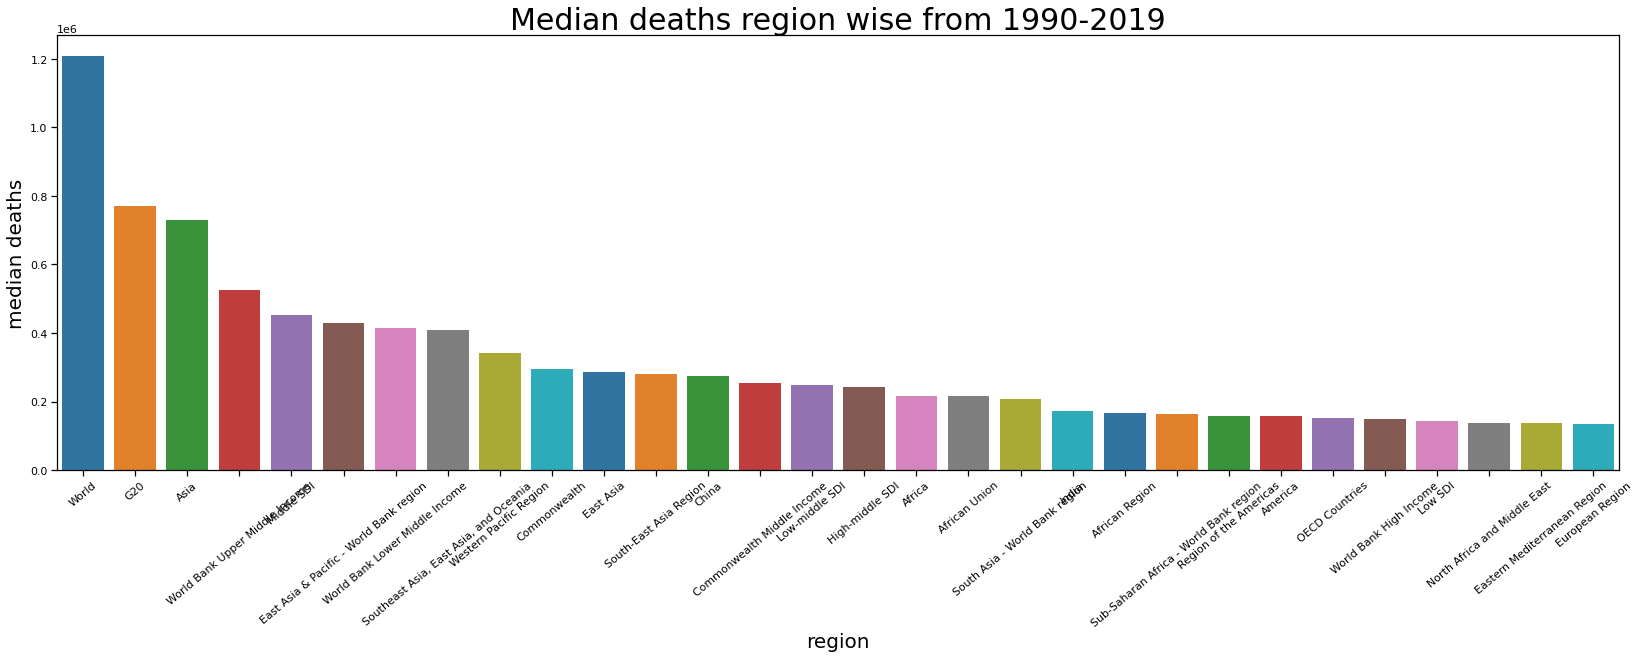

In [87]:
plt.figure(figsize=(28, 8))
sns.barplot(data = median_deaths_region_wise, x = 'Region', y = 'Median Deaths', palette = 'tab10')
plt.title('Median deaths region wise from 1990-2019', size = 30)
plt.xlabel('region', size = 20)
plt.ylabel('median deaths', size = 20)
plt.xticks(rotation = 40)
plt.show()

Max Mean Percentage Deaths Region wise from 1990-2019 (in top 30 Regions)

In [89]:
max_death_percent  = df.groupby('Region')['%_death'].mean().reset_index()
max_death_percent.columns = ['Region', '%_death']
max_death_percent = max_death_percent.sort_values('%_death', ascending=False)[:30]
max_death_percent.head()

,Region,%_death
91,G20,11.958696
263,World Bank Upper Middle Income,8.223048
152,Middle SDI,6.983704
71,East Asia & Pacific - World Bank region,6.682003
262,World Bank Lower Middle Income,6.458776


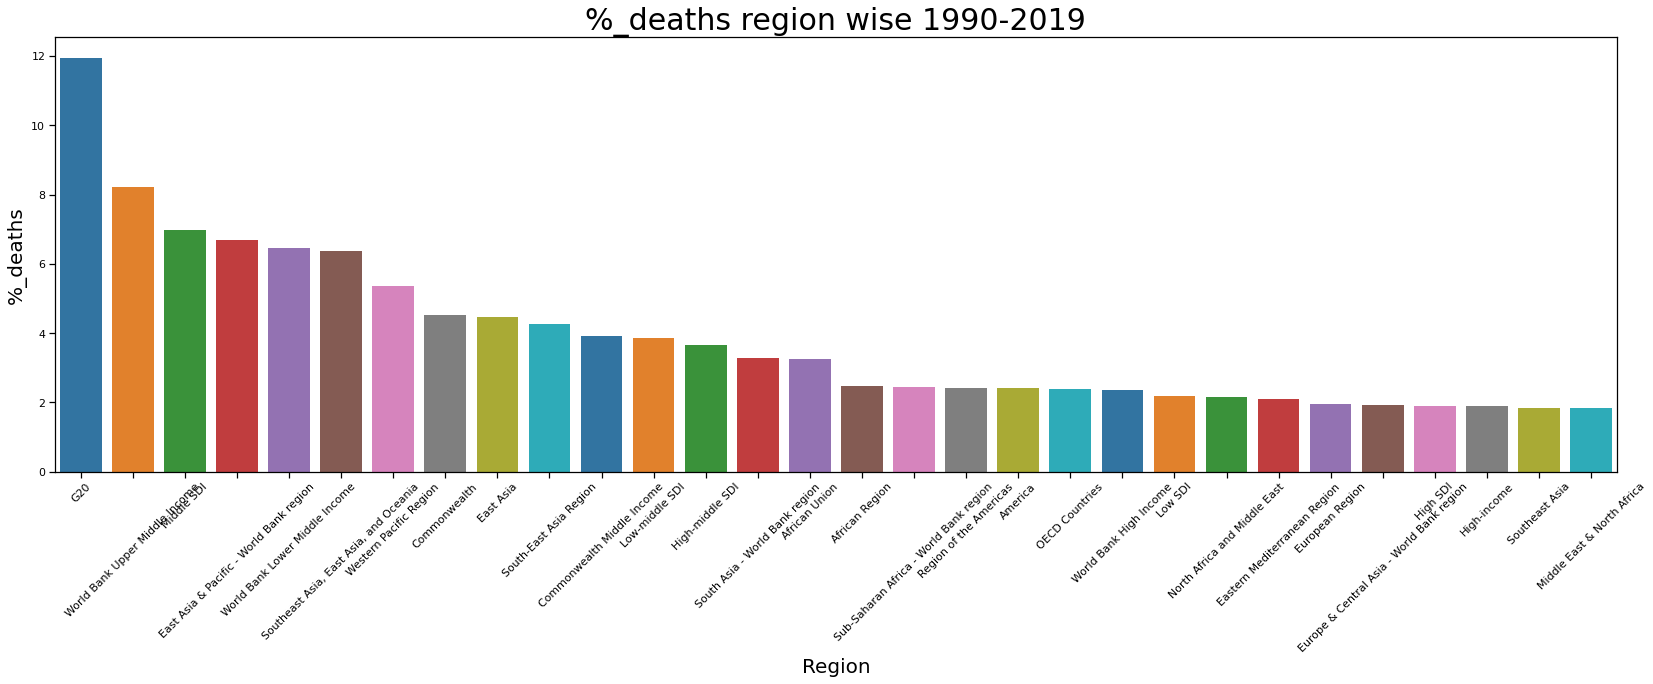

In [96]:
plt.figure(figsize=(28, 8))
sns.barplot(data=max_death_percent, x = 'Region', y = '%_death', palette='tab10')
plt.title('%_deaths region wise 1990-2019', size = 30)
plt.ylabel('%_deaths', size = 20)
plt.xlabel('Region', size = 20)
plt.xticks(rotation = 45)
plt.show()

Total Deaths Year wise from 1990-2019

In [95]:
total_deaths_year_wise = df.groupby('Year')['Deaths'].sum().reset_index()
total_deaths_year_wise.columns = ['Year', 'Total Deaths']
total_deaths_year_wise = total_deaths_year_wise.sort_values('Total Deaths', ascending=False)
total_deaths_year_wise.head()

,Year,Total Deaths
18,2008,12594304
19,2009,12554082
20,2010,12514013
17,2007,12500797
15,2005,12482085


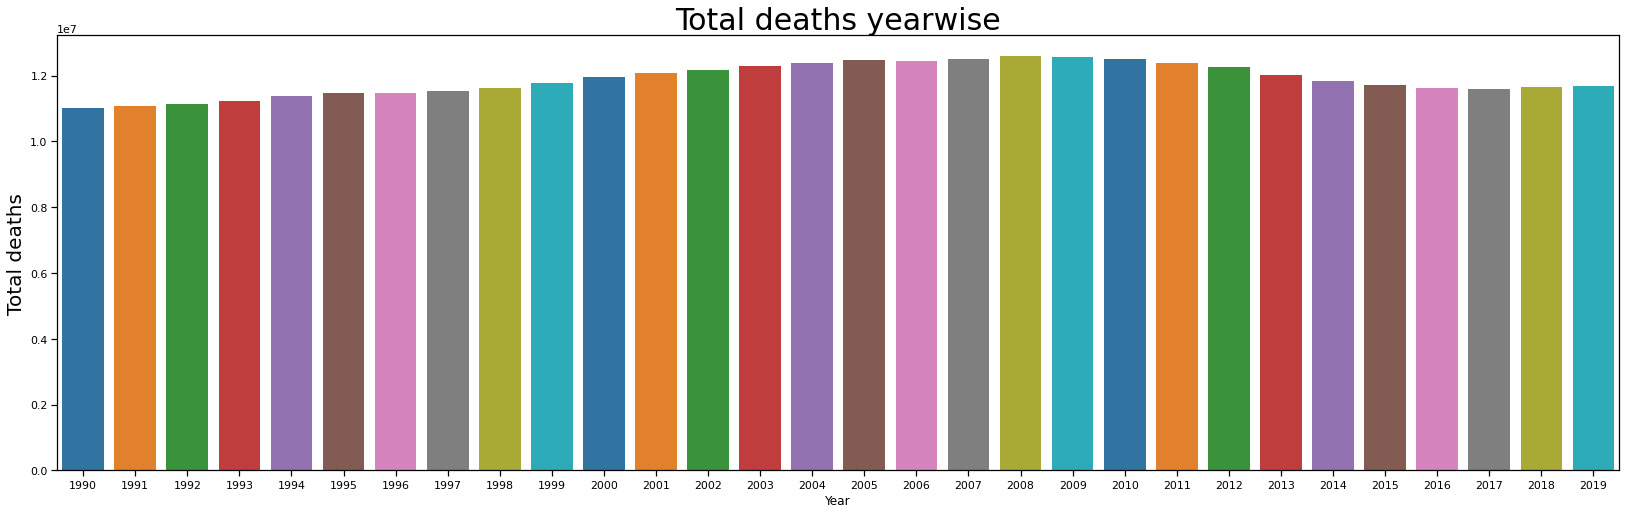

In [100]:
plt.figure(figsize=(28, 8))
sns.barplot(data = total_deaths_year_wise, x = 'Year', y = 'Total Deaths', palette='tab10')
plt.title('Total deaths yearwise', size = 30)
plt.ylabel('Total deaths', size = 20)
plt.xlabel('Year')
plt.show()

Percentage Deaths Year wise from 1990-2019

In [102]:
percent_deaths_years_wise = df.groupby('Year')['%_death'].mean().reset_index()
percent_deaths_years_wise.columns = ['Year', '%_deaths']
percent_deaths_years_wise = percent_deaths_years_wise.sort_values('%_deaths', ascending=False)
percent_deaths_years_wise.head()

,Year,%_deaths
18,2008,0.523725
19,2009,0.521738
17,2007,0.520297
15,2005,0.520047
20,2010,0.519612


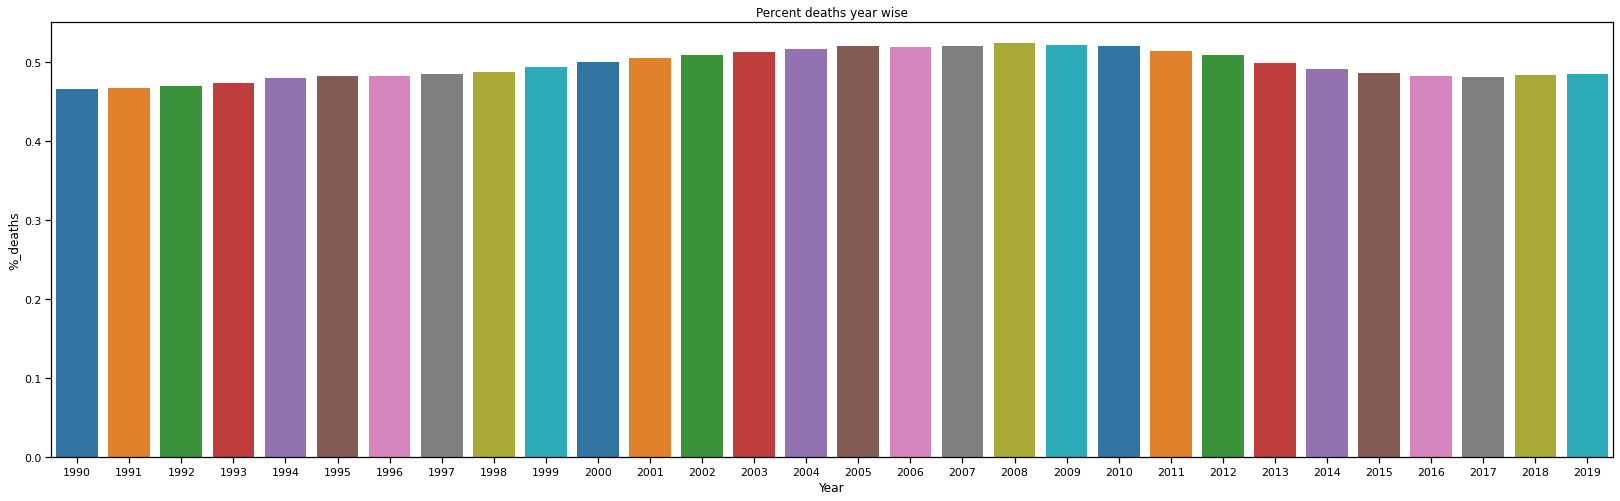

In [105]:
plt.figure(figsize=(28, 8))
sns.barplot(data = percent_deaths_years_wise, x = 'Year', y = '%_deaths', palette='tab10')
plt.title('Percent deaths year wise')
plt.xlabel('Year')
plt.ylabel('%_deaths')
plt.show()

Top Regions with Max Deaths Year wise from 2015-2019

In [114]:
df1 = df[df['Year'] >= 2015]
region_with_max_deaths_year_wise = df1.groupby(['Year', 'Region'])['Deaths'].max().reset_index()
region_with_max_deaths_year_wise.columns = ['Year', 'Region', 'Total Deaths']
region_with_max_deaths_year_wise = region_with_max_deaths_year_wise.sort_values('Total Deaths', ascending=False)[:150]
region_with_max_deaths_year_wise.head()

,Year,Region,Total Deaths
259,2015,World,1202132
1327,2019,World,1198289
1060,2018,World,1196641
526,2016,World,1194268
793,2017,World,1189003


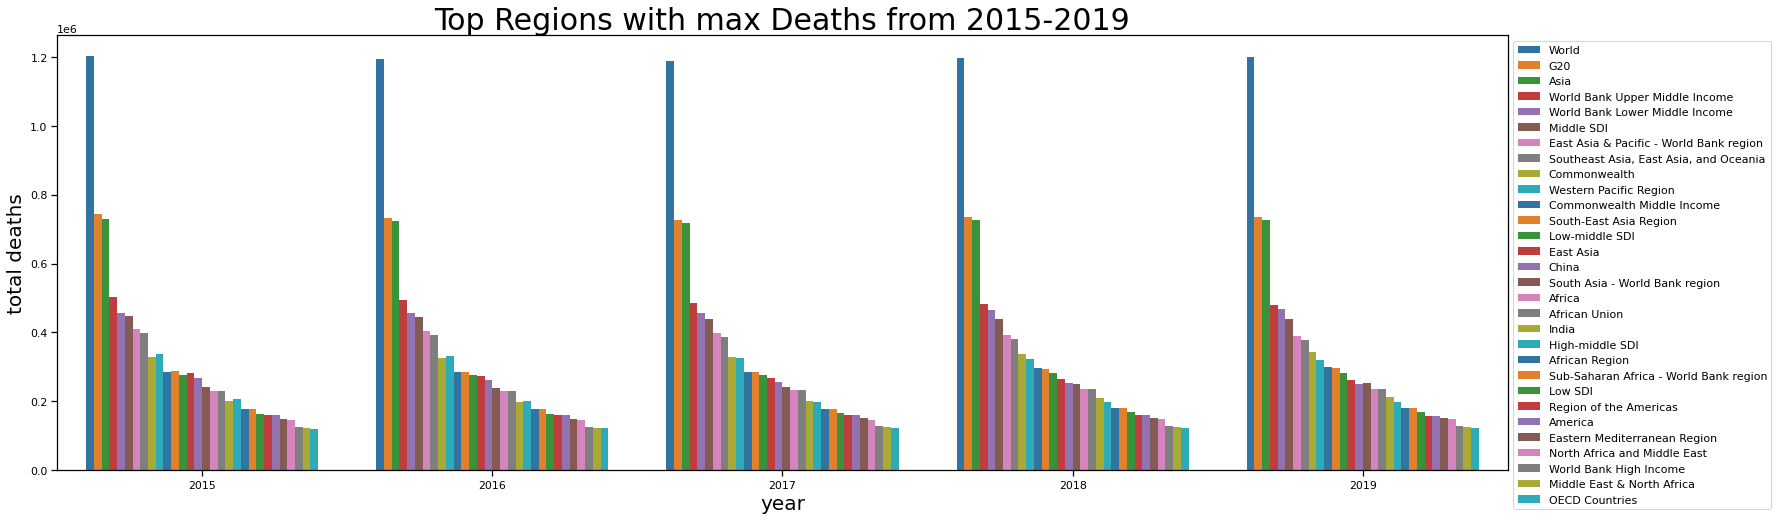

In [115]:
plt.figure(figsize=(26, 8))
sns.barplot(data = region_with_max_deaths_year_wise, x = 'Year', y = 'Total Deaths', hue = 'Region', palette='tab10')
plt.title('Top Regions with max Deaths from 2015-2019', size = 30)
plt.ylabel('total deaths', size = 20)
plt.xlabel('year', size = 20)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()